In [39]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage

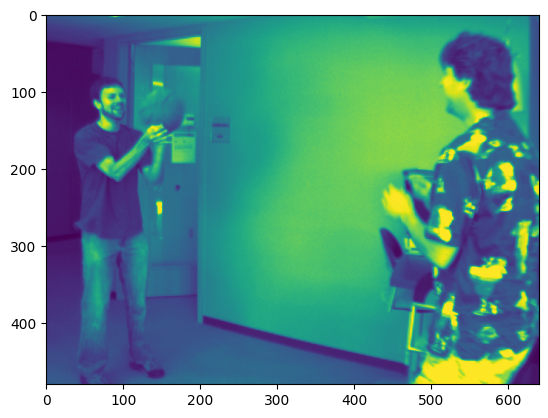

In [40]:
img1 = cv.imread('./img/basketball1.png')
img2 = cv.imread('./img/basketball2.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(img1)
plt.show()

In [41]:
class flow:
    def __init__(self,img1,img2):
        self.img1 = img1/255
        self.img2 = img2/255
        self.R,self.C = img1.shape
    
    def sp_derivative(self,img1,img2):
        self.Kx = np.array([[-1,1],
                            [-1,1],])
        self.Ky = (self.Kx).T
        
        self.F1x = ndimage.convolve(img1, self.Kx)
        self.F1y = ndimage.convolve(img1, self.Ky)

        self.F2x = ndimage.convolve(img2, self.Kx)
        self.F2y = ndimage.convolve(img2, self.Ky)

        self.Ft = img2 - img1
        # return self.F1x +self.F2x,self.F1y+self.F2y,self.F2x,self.F2y,np.array(self.Ft)
        return self.F1x ,self.F1y,self.F2x,self.F2y,np.array(self.Ft)


    def UV(self,img1,img2,u,v ):
        F1x,F1y,F2x,F2y,Ft = self.sp_derivative(img1,img2)
        w=3
        U = np.zeros(([self.R,self.C]))
        V = np.zeros(([self.R,self.C]))
        error =0
        for i in range(w,self.R-w):
            for j in range(w,self.C-w):
                Ix = F1x[i-1:i+2,j-1:j+2].flatten()
                Iy = F1y[i-1:i+2,j-1:j+2].flatten()
                It = Ft[i-1:i+2,j-1:j+2].flatten()

                A_t = np.array([Ix,Iy])
                # print(It.shape)
                A = A_t.T
                # print(A.shape)
                A_f = np.dot(A_t,It)
                inver = np.dot(A_t,A)
                if (np.linalg.det(inver) !=0):
                    inverse = np.linalg.inv(inver)
                    U[i,j], V[i,j] = np.dot(inverse,A_f)
                    u[i,j] = u[i,j]*0.5+ U[i,j]*0.5
                    v[i,j] = v[i,j]*0.5 + V[i,j]*0.5
                    error+=1
        print(error)

        return u,v
                
    def sampling(self , level):
        images1 = np.zeros(([level,self.R,self.C]))
        for i in range(level):
            t = 2**i
            r = self.R/t
            c = self.C/t
            down = (int(c),int(r))
            up = (self.C,self.R)
            resized_down = cv.resize(self.img1,down,interpolation=cv.INTER_LINEAR)
            resized_up = cv.resize(resized_down,up,interpolation=cv.INTER_LINEAR)
            dst = cv.GaussianBlur(resized_up,(5,5),cv.BORDER_DEFAULT)
            
            
            images1[i] = dst

        fig = plt.figure(figsize=((9, 7)))
        ax0 ,ax1, ax2, ax3 = fig.subplots(2, 2,).ravel()
        fig.tight_layout()
        ax0.imshow(images1[0], cmap='gray')
        ax1.imshow(images1[1], cmap='gray')
        ax2.imshow(images1[2], cmap='gray')
        ax3.imshow(images1[3], cmap='gray')
        plt.show()

        images2 = np.zeros(([level,self.R,self.C]))
        for i in range(level):
            t = 2**i
            r = self.R/t
            c = self.C/t
            down = (int(c),int(r))
            up = (self.C,self.R)
            resized_down = cv.resize(self.img2,down,interpolation=cv.INTER_LINEAR)
            resized_up = cv.resize(resized_down,up,interpolation=cv.INTER_LINEAR)
            dst = cv.GaussianBlur(resized_up,(5,5),cv.BORDER_DEFAULT)
            
            images2[i] = dst


        fig = plt.figure(figsize=((9, 7)))
        ax0 ,ax1, ax2, ax3 = fig.subplots(2, 2,).ravel()
        fig.tight_layout()
        ax0.imshow(images2[0], cmap='gray')
        ax1.imshow(images2[1], cmap='gray')
        ax2.imshow(images2[2], cmap='gray')
        ax3.imshow(images2[3], cmap='gray')
        plt.show()


        temp = level-1
        u = np.zeros(([self.R,self.C]))
        v = np.zeros(([self.R,self.C]))
        while(temp >=0):
            
            u,v = self.UV(images1[temp] , images2[temp],u,v)
            image = images1[temp]*0.5+ images2[temp]*0.5
            if (temp > 0):
                images1[temp-1] = images1[temp-1]*0.35 + image*0.65
            plt.imshow(images1[temp-1])
            plt.show()
            temp = temp-1

        return u,v 


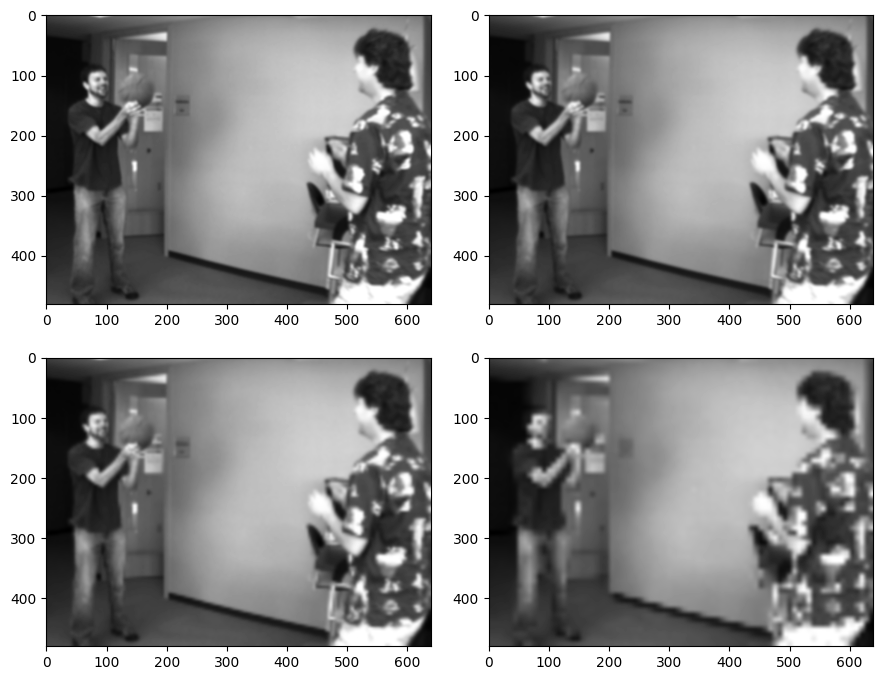

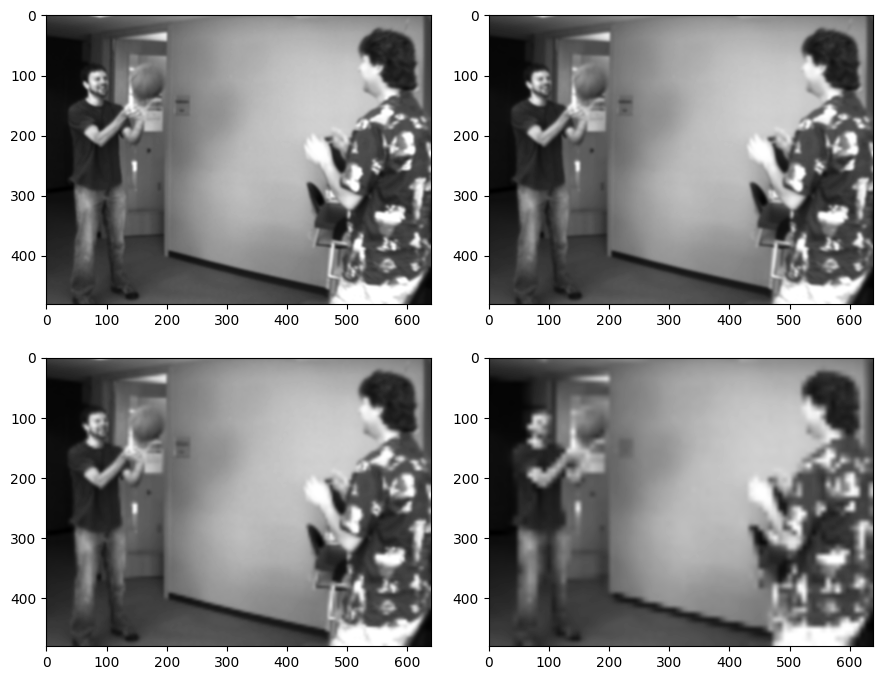

272539


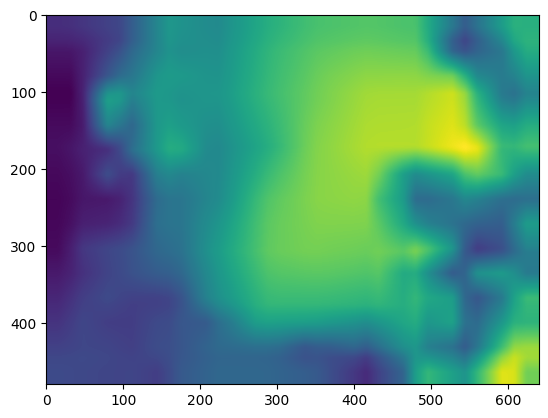

290052


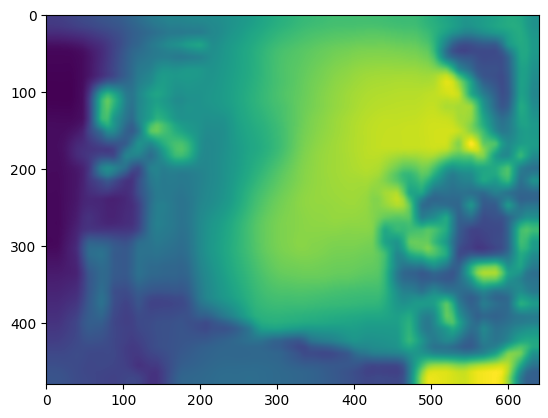

298795


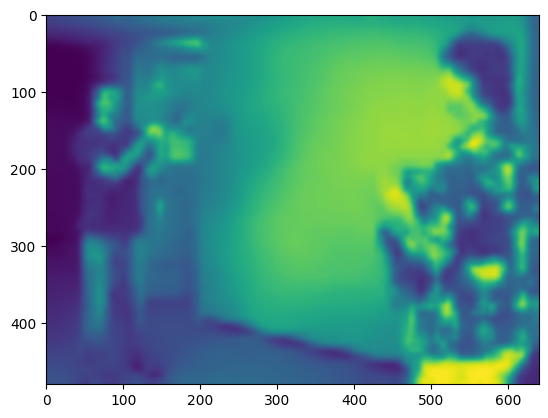

300516


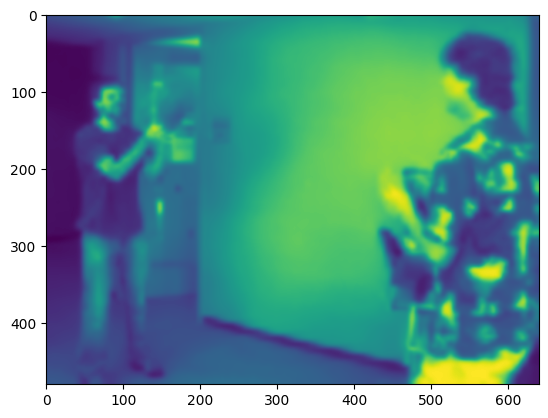

300516


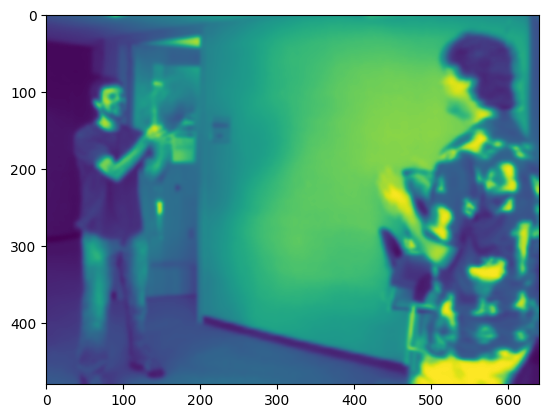

300516


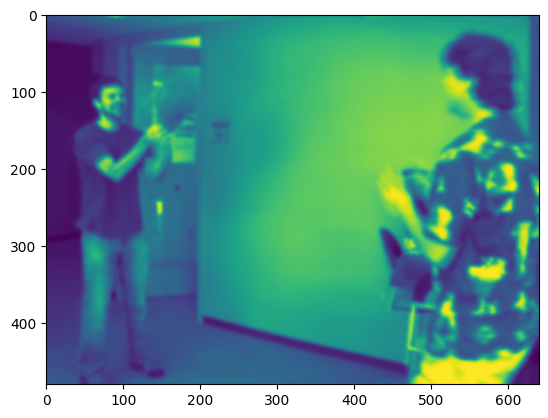

300516


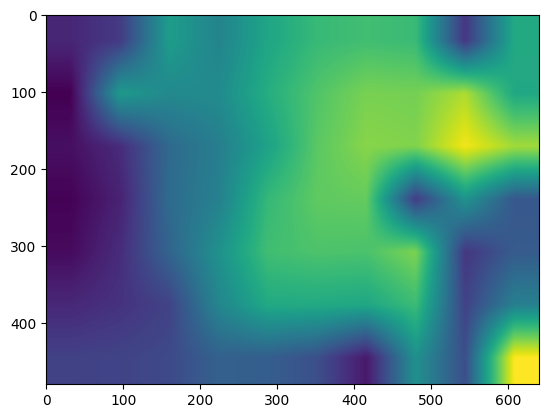

In [42]:
opt = flow(img1,img2)
# F1x,F1y,F2x,F2y,Ft = opt.sp_derivative(img1,img2)
# U,V,e = opt.UV(img1,img2)
a = np.array(([img1.shape]))
b = np.array(([img1.shape]))

U,V = opt.sampling(5)


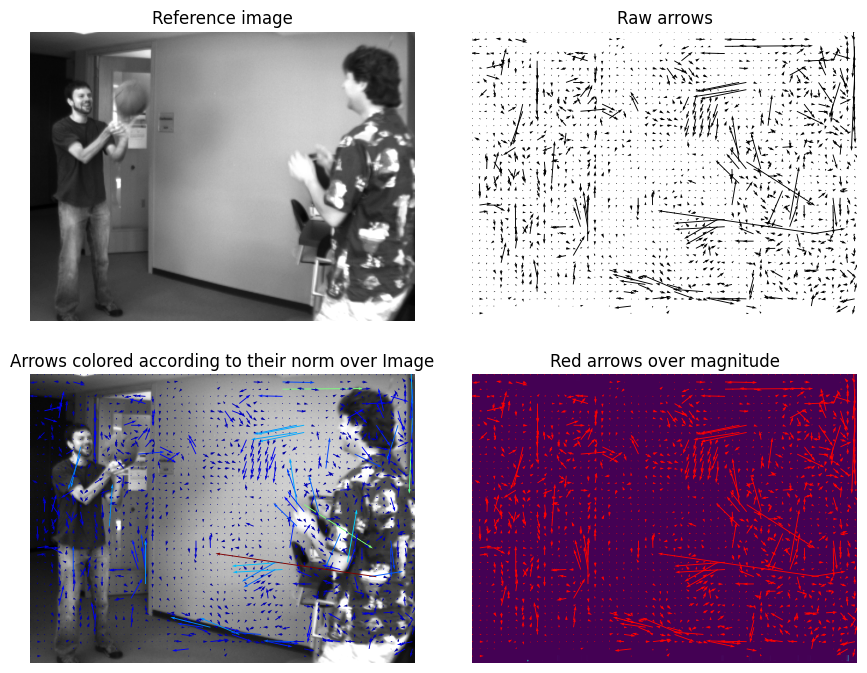

In [43]:
import pyimof
norm = np.sqrt(U*U + V*V )


fig = plt.figure(figsize=((9, 7)))
ax0 ,ax1, ax2, ax3 = fig.subplots(2, 2,).ravel()
fig.tight_layout()

ax0.imshow(img2, cmap='gray')
ax0.set_axis_off()
ax0.set_title("Reference image")

pyimof.display.quiver(U, V, ax=ax1)
ax1.set_title("Raw arrows")

pyimof.display.quiver(U, V, c=norm, bg=img1, ax=ax2,
                      cmap='jet', bg_cmap='gray')
ax2.set_title("Arrows colored according to their norm over Image")

pyimof.display.quiver(U, V, bg=norm, ax=ax3, color='r')
ax3.set_title("Red arrows over magnitude")

plt.show()
